In [1]:
#pip install minigrid
import gymnasium as gym
import minigrid
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper, RGBImgObsWrapper, FullyObsWrapper
from minigrid.envs.crossing import CrossingEnv
import numpy.random as r
import matplotlib.pyplot as plt

In [2]:
name1 = 'MiniGrid-LavaCrossingS11N5-v0'
name2 = 'MiniGrid-SimpleCrossingS11N5-v0'
name3 = 'MiniGrid-Dynamic-Obstacles-16x16-v0'
name4 = 'MiniGrid-DoorKey-5x5-v0'
name5 = 'MiniGrid-Empty-16x16-v0'

In [3]:
import math
class ActionBonus(gym.Wrapper):
    """
    Wrapper which adds an exploration bonus.
    This is a reward to encourage exploration of less
    visited (state,action) pairs.
    """

    def __init__(self, env):
        super().__init__(env)
        self.counts = {}

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)

        env = self.unwrapped
        tup = (tuple(env.agent_pos), env.agent_dir, action)

        # Get the count for this (s,a) pair
        pre_count = 0
        if tup in self.counts:
            pre_count = self.counts[tup]

        # Update the count for this (s,a) pair
        new_count = pre_count + 1
        self.counts[tup] = new_count

        bonus = 1 / math.sqrt(new_count)
        reward += bonus
        
        #just for taking a step
        reward += -0.1

        return obs, reward, terminated, truncated, info

    def reset(self, **kwargs):
        self.counts.clear()
        return self.env.reset(**kwargs)

In [4]:
class Enviroment:
    #full_observability: False for partial or True for full
    
    def __init__(self, name, full_observability = False):
        
        self.full_observability = full_observability
        self.env = gym.make(name)
        
        if full_observability:
            self.env = FullyObsWrapper(self.env) # Get rid of the 'mission' field
            
        self.env = ActionBonus(self.env)
                
    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        return obs, reward, terminated, truncated, info
    
    def reset(self):
        obs, _ = self.env.reset()
        return obs
    
    def render(self):
        if self.full_observability:
            return self.env.get_full_render(False, 64)
        else:
            return self.env.get_frame(False, 64, True)

In [5]:
from minigrid.core.actions import Actions

actions = Actions
print(actions.left)

Actions.left


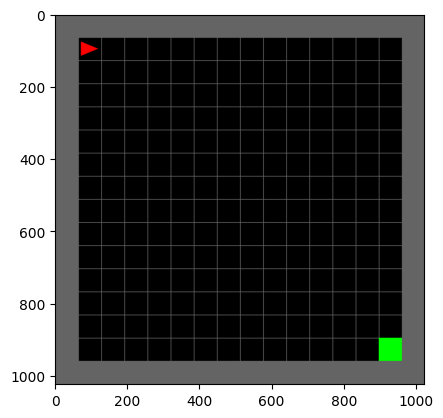

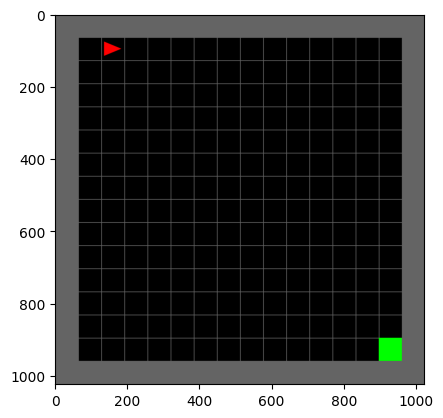

reward: 0.9


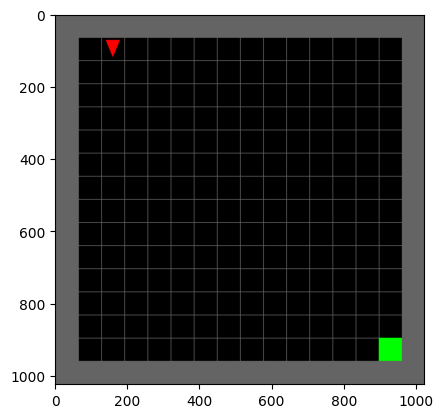

reward: 0.9


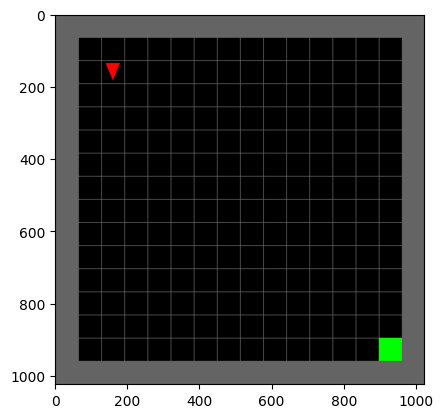

reward: 0.9


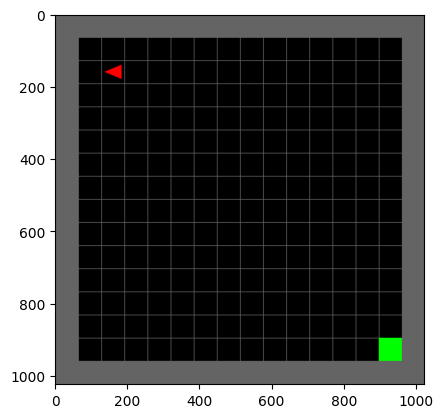

reward: 0.9


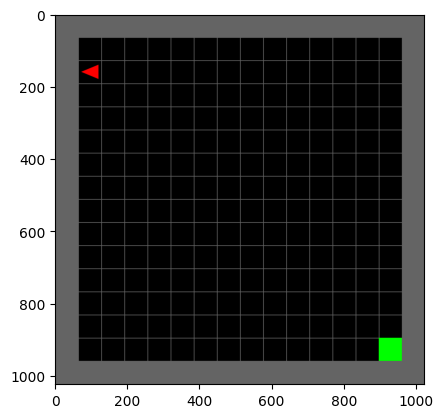

reward: 0.9


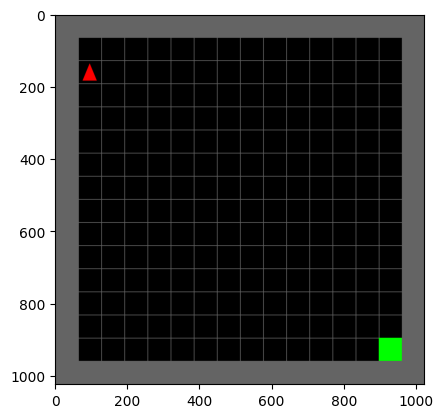

reward: 0.9


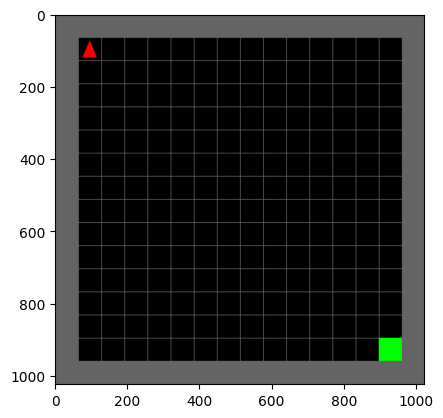

reward: 0.9


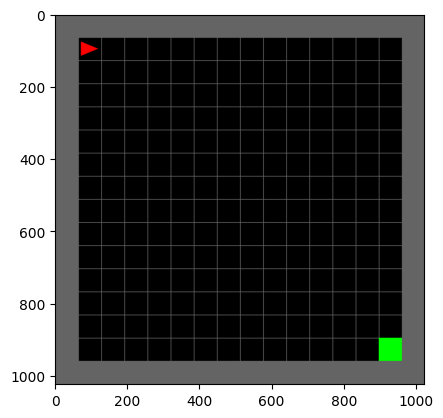

reward: 0.9


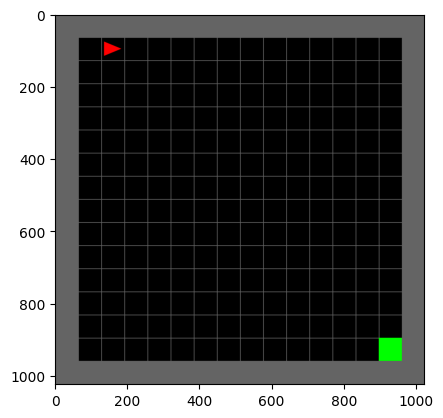

reward: 0.6071067811865475


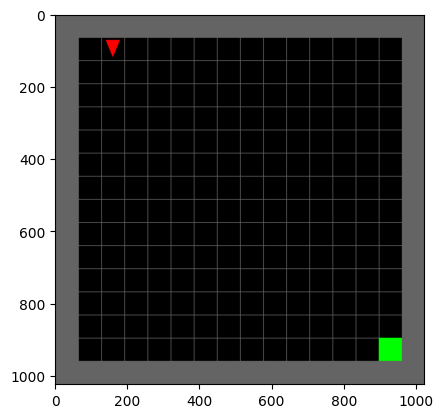

reward: 0.6071067811865475


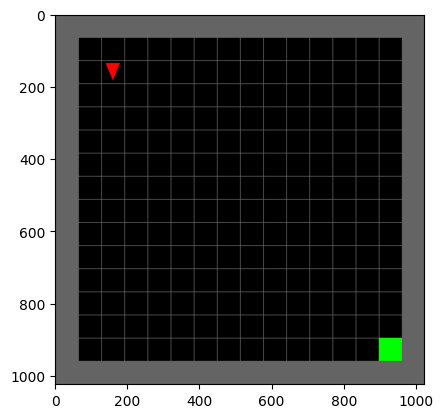

reward: 0.6071067811865475


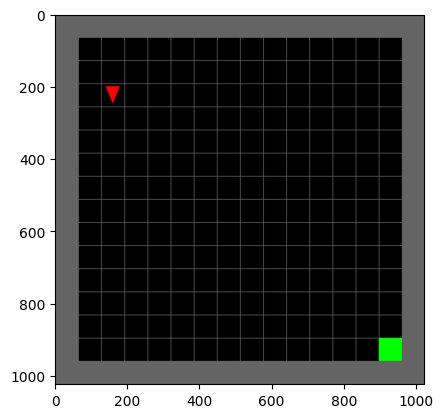

reward: 0.9


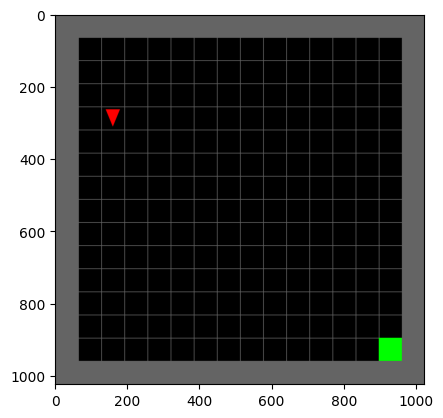

reward: 0.9


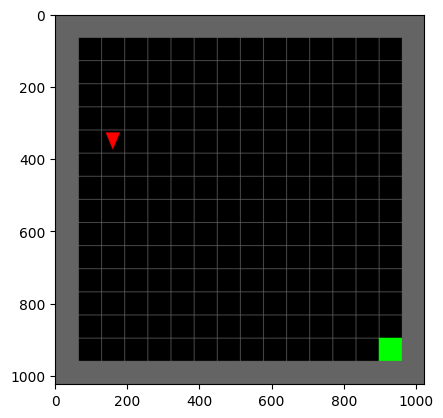

reward: 0.9


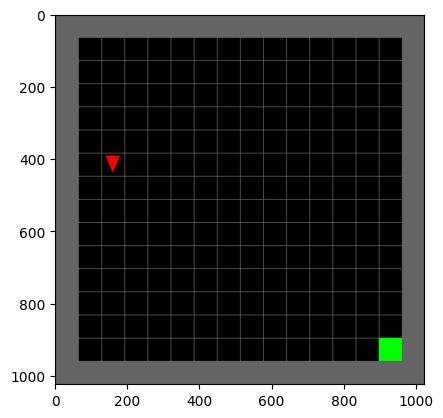

reward: 0.9


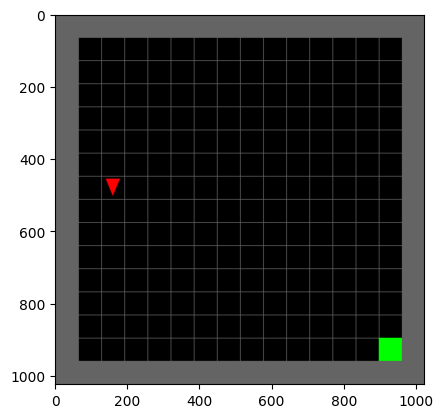

reward: 0.9


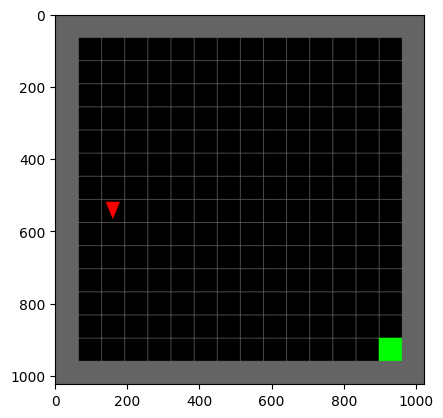

reward: 0.9


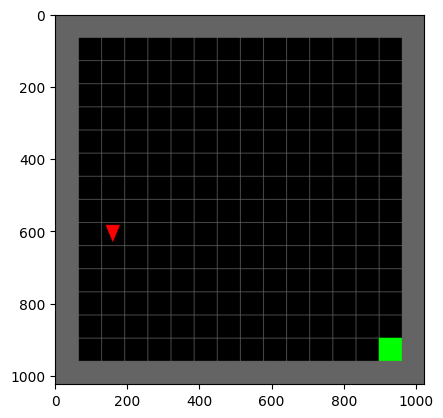

reward: 0.9


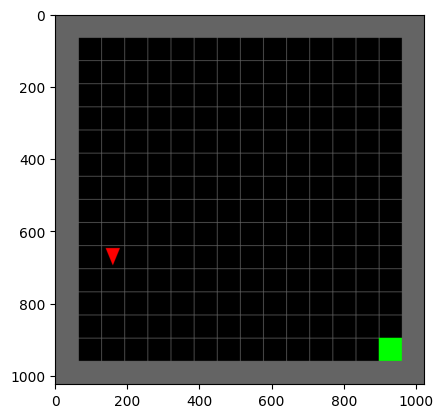

reward: 0.9


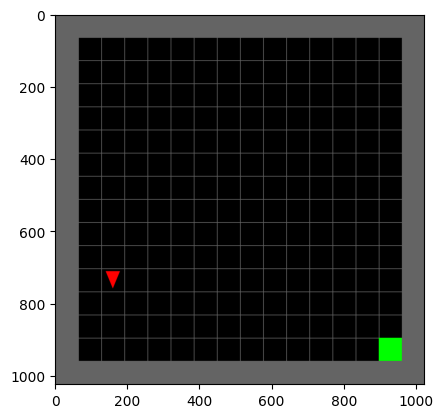

reward: 0.9


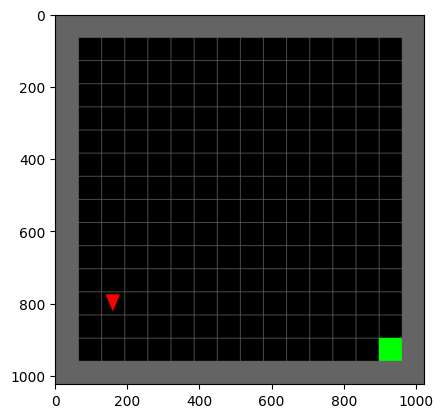

reward: 0.9


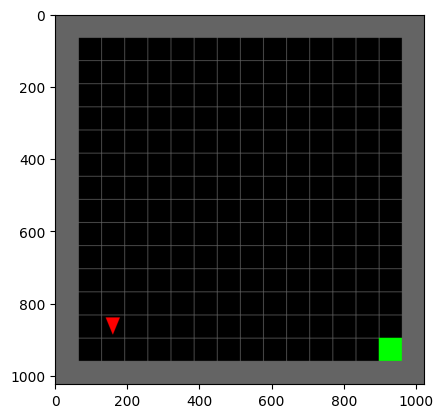

reward: 0.9


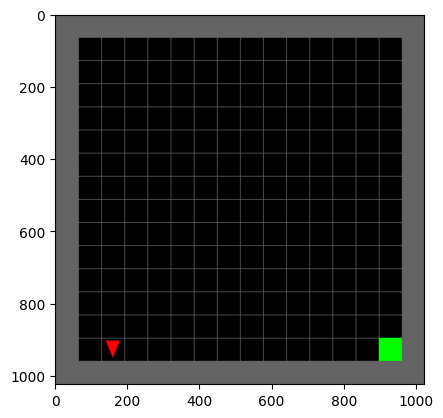

reward: 0.9


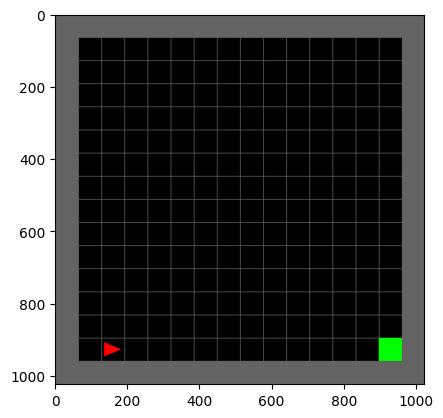

reward: 0.9


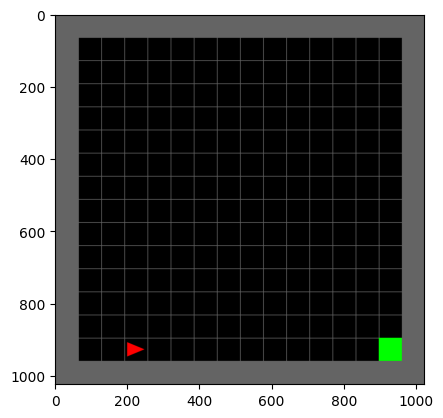

reward: 0.9


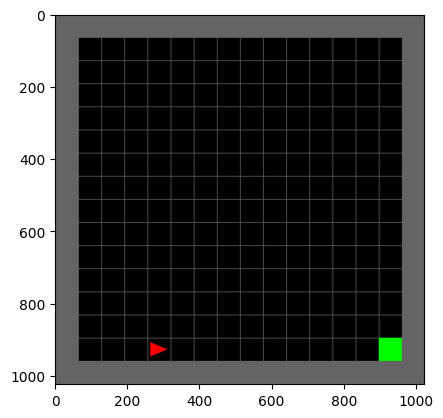

reward: 0.9


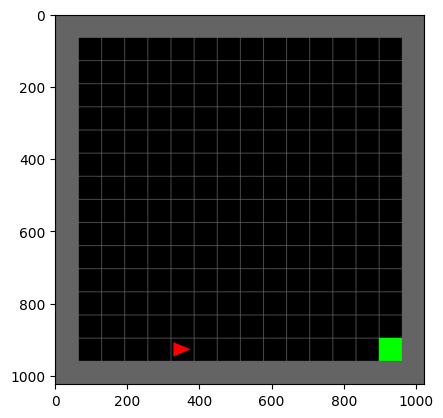

reward: 0.9


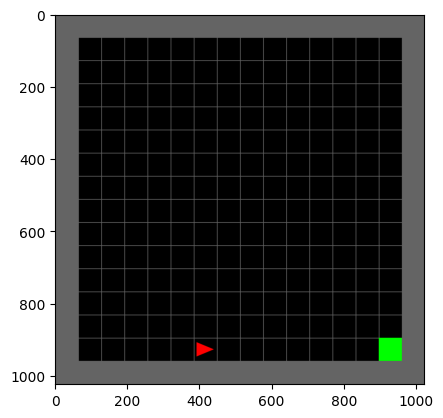

reward: 0.9


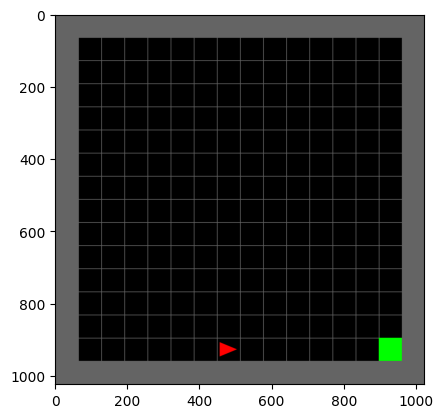

reward: 0.9


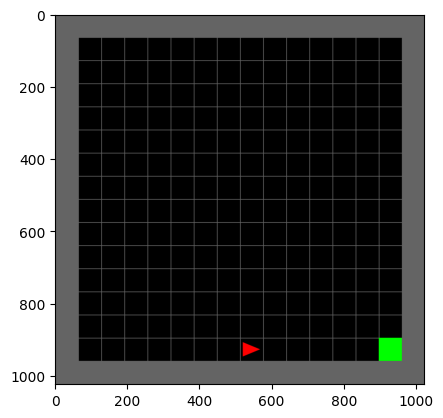

reward: 0.9


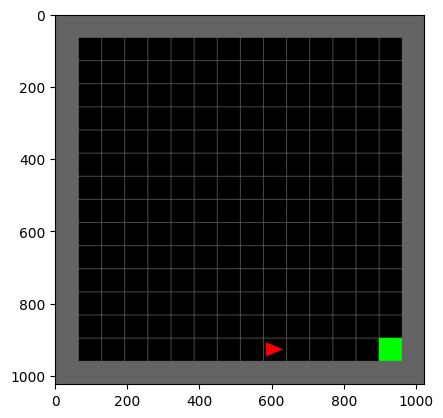

reward: 0.9


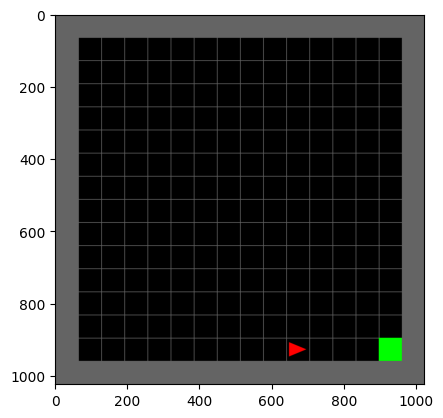

reward: 0.9


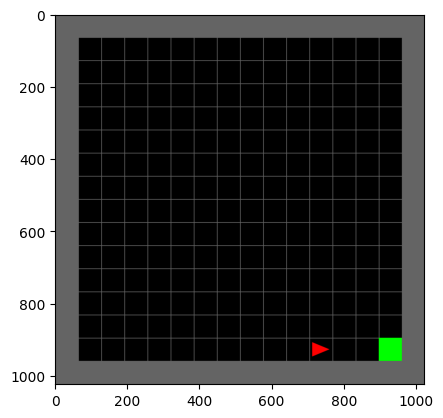

reward: 0.9


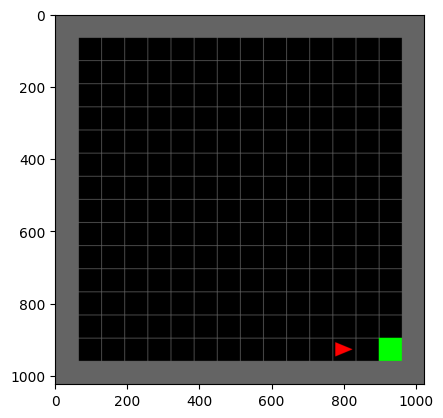

reward: 0.9


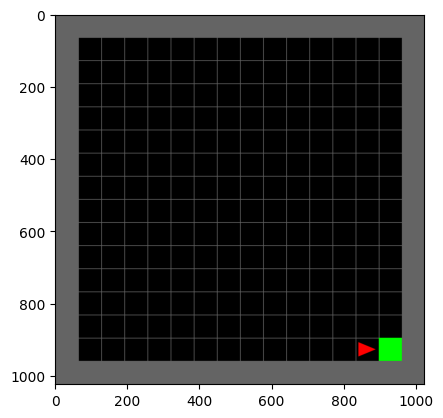

reward: 0.9


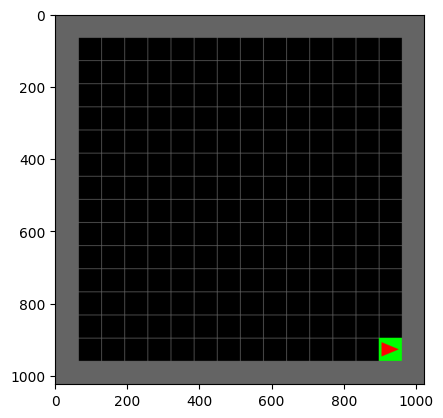

reward: 1.8683593749999998


In [6]:
import numpy as np
env = Enviroment(name5, full_observability = True)
obs = env.reset()

#print(obs['image'][:,:,0])
#print(obs['image'][:,:,1])
#print(obs['image'][:,:,2])

img = env.render()

plt.imshow(img)
plt.show()

obs, reward, terminated, truncated, info = env.step(actions.forward)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.right)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.forward)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.right)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.forward)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.right)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.forward)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.right)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.forward)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

obs, reward, terminated, truncated, info = env.step(actions.right)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

for _ in range(13):
    obs, reward, terminated, truncated, info = env.step(actions.forward)

    img = env.render()

    plt.imshow(img)
    plt.show()
    print("reward:", reward)
    
obs, reward, terminated, truncated, info = env.step(actions.left)

img = env.render()

plt.imshow(img)
plt.show()
print("reward:", reward)

for _ in range(12):
    obs, reward, terminated, truncated, info = env.step(actions.forward)

    img = env.render()

    plt.imshow(img)
    plt.show()
    print("reward:", reward)